In [1]:
#Mon bînome est Cissé Ahmed 
# Première étape : il faut charger la librarie Pandas
import pandas

# On modifie le nombre de ligne à afficher
pandas.options.display.max_rows =10

# Exercice 1

In [2]:
capital_df = pandas.read_excel('capital.xls', sheet_name='Feuil1')
print(capital_df)

                   X      Y              Z
0    Aix en provence  18.94        Sud-Est
1            Ajaccio  22.06        Sud-Est
2             Amiens  17.97           Nord
3             Angers  18.86          Ouest
4             Annecy  14.97        Sud-Est
..               ...    ...            ...
95        Vénissieux  18.70        Sud-Est
96        Versailles   8.95  Ile-de-France
97  Villeneuve-d'Asq  29.96           Nord
98      Villeurbanne  19.85        Sud-Est
99   Vitry-sur-Seine  11.50  Ile-de-France

[100 rows x 3 columns]


In [3]:
# voir les graphiques dans le notebook
%matplotlib inline
# importation de librairie
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Centre'}>,
        <AxesSubplot:title={'center':'Est'}>,
        <AxesSubplot:title={'center':'Ile-de-France'}>],
       [<AxesSubplot:title={'center':'Nord'}>,
        <AxesSubplot:title={'center':'Ouest'}>,
        <AxesSubplot:title={'center':'Sud-Est'}>],
       [<AxesSubplot:title={'center':'Sud-Ouest'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

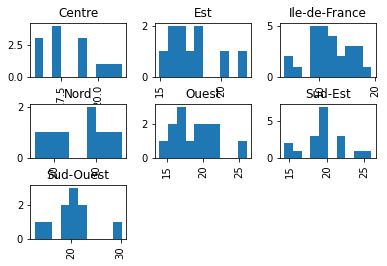

In [264]:
capital_df.hist(column='Y', by='Z')

<AxesSubplot:title={'center':"Taux d'habitation par régions"}, xlabel='Z', ylabel='Y'>

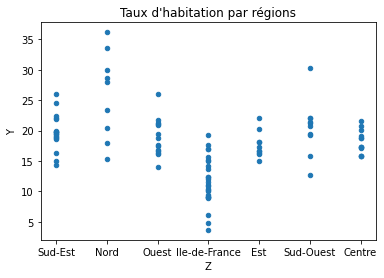

In [261]:
capital_df.plot.scatter(x='Z',y='Y', title="Taux d'habitation par régions")

In [16]:
capital_df['Z'].value_counts()

Ile-de-France    26
Sud-Est          18
Ouest            14
Centre           13
Est              10
Sud-Ouest        10
Nord              9
Name: Z, dtype: int64

<AxesSubplot:title={'center':'Nombre de villes par régions'}, ylabel='Z'>

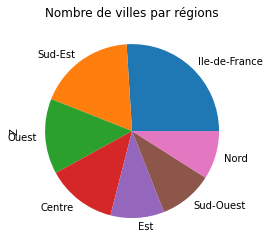

In [266]:
capital_df['Z'].value_counts().plot.pie(title="Nombre de villes par régions")
#L'Île-de-France est la plus représentée.

In [18]:
capital_df.describe()

,Y
count,100.000000
mean,17.770700
std,5.529599
min,3.680000
25%,15.062500
50%,17.625000
75%,20.522500
max,36.170000


In [42]:
capital_df.groupby(capital_df['Z']).describe()

Y                                                        \
              count       mean       std    min      25%     50%      75%   
Z                                                                           
Centre         13.0  18.115385  1.906881  15.77  17.0700  17.370  19.1900   
Est            10.0  17.662000  2.095200  14.98  16.3875  16.975  18.1850   
Ile-de-France  26.0  11.764615  3.879327   3.68   9.2425  11.285  14.7375   
Nord            9.0  25.951111  7.099798  15.37  20.4600  27.970  29.9600   
Ouest          14.0  18.896429  3.098314  14.00  16.6875  18.265  21.0900   
Sud-Est        18.0  19.769444  2.938534  14.30  18.7675  19.575  21.4225   
Sud-Ouest      10.0  20.511000  4.549406  12.72  19.2700  21.010  21.9325   

                      
                 max  
Z                     
Centre         21.55  
Est            22.04  
Ile-de-France  19.32  
Nord           36.17  
Ouest          25.99  
Sud-Est        25.98  
Sud-Ouest      30.23

#L'Île de France est la plus intéressante pour le taux de la taxe d'habitation
#leur taux de taxe d'habitation moyenne le plus bas et son std est moyenne (3.879327) parmi les resultats

In [77]:
regions = ['Centre','Est','Ile-de-France','Nord','Ouest','Sud-Est','Sud-Ouest']

In [78]:
means = [18.115385,17.662000,11.764615,25.95111,18.896429,19.769444,20.511000]

In [268]:
import numpy
import sys

def distance(x):
    mean_total = 17.770700
    return(abs(x-mean_total))
min_distance = sys.maxsize
i=0
for mean in means :
    r_distance = distance(mean)
    if r_distance<min_distance :
        min_distance = r_distance
        min_index = i
    i=i+1

print(min_distance)
print(regions[min_index])

0.10870000000000246
Est


In [ ]:
#La région Est est la plus représentative de la moyenne nationale

In [84]:
data = {'Regions': regions, 'Means': means}
df = pandas.DataFrame(data)
print(df)

         Regions      Means
0         Centre  18.115385
1            Est  17.662000
2  Ile-de-France  11.764615
3           Nord  25.951110
4          Ouest  18.896429
5        Sud-Est  19.769444
6      Sud-Ouest  20.511000


In [ ]:
#Groupe 1 mean 18.115385
#Groupe 2 mean 17.662000

In [88]:
#Algo de groupe par mean
# fonction call back
#Groupe 1 ,regions[0], mean = 18.115385
##Groupe 2 ,regions[1], mean = 17.662000
def operation(x):
    return(x.mean())
print("Groupe 3 ")
df.iloc[2:,:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 


Means    19.37852
dtype: float64

In [92]:
print("Groupe 2 ")
df.iloc[1:3,:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 2 


Means    14.713307
dtype: float64

In [90]:
print("Groupe 3 ")
df.iloc[3:,:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 


Means    21.281996
dtype: float64

In [269]:
print("Groupe 1 ")
df.iloc[[0,1],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 1 


Means    17.888692
dtype: float64

In [270]:
print("Groupe 2 ")
df.iloc[[2],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 2 


Means    11.764615
dtype: float64

In [271]:
print("Groupe 3 ")
df.iloc[3:,:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 


Means    21.281996
dtype: float64

In [272]:
print("Groupe 1 ")
df.iloc[[0,1,4],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 1 


Means    18.224605
dtype: float64

In [273]:
print("Groupe 2 ")
df.iloc[[2],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 2 


Means    11.764615
dtype: float64

In [274]:
print("Groupe 3 ")
df.iloc[[3,5,6],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 


Means    22.077185
dtype: float64

In [275]:
print("Groupe 1 ")
df.iloc[[0,1,4,5],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 1 


Means    18.610814
dtype: float64

In [276]:
print("Groupe 2 ")
df.iloc[[2],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 2 


Means    11.764615
dtype: float64

In [277]:
print("Groupe 3 ")
df.iloc[[3,6],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 


Means    23.231055
dtype: float64

In [278]:
print("Groupe 1 ")
df.iloc[[0,1,4,5,6],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 1 


Means    18.990852
dtype: float64

In [279]:
print("Groupe 2 ")
df.iloc[[2],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 2 


Means    11.764615
dtype: float64

In [280]:
print("Groupe 3 ")
df.iloc[[3],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 


Means    25.95111
dtype: float64

In [282]:
#final groupes
print("Groupe 1 ")
print(regions[0]+', '+regions[1]+', '+regions[4]+', '+regions[5]+', '+regions[6]) 
df.iloc[[0,1,4,5,6],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 1 
Centre, Est, Ouest, Sud-Est, Sud-Ouest


Means    18.990852
dtype: float64

In [283]:
print("Groupe 2 ")
print(regions[2]) 
df.iloc[[2],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 2 
Ile-de-France


Means    11.764615
dtype: float64

In [284]:
print("Groupe 3 ")
print(regions[3]) 
df.iloc[[3],:].select_dtypes(exclude=['object']).apply(operation, axis=0)

Groupe 3 
Nord


Means    25.95111
dtype: float64

In [285]:
#Graoupe 1 
print(regions[0],regions[1],regions[4],regions[5],regions[6])

Centre Est Ouest Sud-Est Sud-Ouest


In [286]:
#Graoupe 2 
print(regions[2])

Ile-de-France


In [287]:
#Graoupe 3 
print(regions[3])

Nord


In [126]:
#30% au dessus de la moyenne.
capital_df.sort_values('Y',ascending=False).head((round(0.2*len(capital_df))))

,X,Y,Z
49,Lille,36.17,Nord
91,Tourcoing,33.61,Nord
66,Nimes,30.23,Sud-Ouest
97,Villeneuve-d'Asq,29.96,Nord
39,Dunkerque,28.69,Nord
...,...,...,...
54,Marseille,21.93,Sud-Est
77,Rennes,21.75,Ouest
74,Poitiers,21.55,Centre
58,Montpellier,21.40,Sud-Ouest


In [127]:
#30% en dessous  de la moyenne.
capital_df.sort_values('Y').head((round(0.2*len(capital_df))))

,X,Y,Z
64,Neuilly-sur-Seine,3.68,Ile-de-France
35,Courbevoie,4.86,Ile-de-France
62,Nanterre,6.13,Ile-de-France
96,Versailles,8.95,Ile-de-France
70,Paris,9.15,Ile-de-France
...,...,...,...
87,Sartrouville,12.38,Ile-de-France
10,Aubervilliers,12.45,Ile-de-France
57,Montauban,12.72,Sud-Ouest
59,Montreuil,13.67,Ile-de-France


In [128]:
#20% au dessus de la moyenne.
capital_df.sort_values('Y',ascending=False).head((round(0.3*len(capital_df))))

,X,Y,Z
49,Lille,36.17,Nord
91,Tourcoing,33.61,Nord
66,Nimes,30.23,Sud-Ouest
97,Villeneuve-d'Asq,29.96,Nord
39,Dunkerque,28.69,Nord
...,...,...,...
85,Saint-Quentin,20.46,Nord
15,Besançon,20.20,Est
69,Orléans,20.05,Centre
82,Saint-Etienne,19.90,Sud-Est


In [130]:
#20% en dessous  de la moyenne.
capital_df.sort_values('Y').head((round(0.3*len(capital_df))))

,X,Y,Z
64,Neuilly-sur-Seine,3.68,Ile-de-France
35,Courbevoie,4.86,Ile-de-France
62,Nanterre,6.13,Ile-de-France
96,Versailles,8.95,Ile-de-France
70,Paris,9.15,Ile-de-France
...,...,...,...
28,Champigny/Marne,15.09,Ile-de-France
13,Beauvais,15.37,Nord
11,Aulnay-sous-Bois,15.59,Ile-de-France
20,Bourges,15.77,Centre


# Exercice 2

In [260]:
col_names = ['Birth', 'Death','InfantDeath','Country','Continent']

In [136]:
poverty_df = pandas.read_table("poverty.txt", sep ='\t', names=col_names)
poverty_df

,Birth,Death,InfantDeath,Country,Continent
0,24.7,5.7,30.8,Albania,Europe
1,12.5,11.9,14.4,Bulgaria,Europe
2,13.4,11.7,11.3,Czechoslovakia,Europe
3,12.0,12.4,7.6,Former_E._Germany,Europe
4,11.6,13.4,14.8,Hungary,Europe
...,...,...,...,...,...
92,52.2,15.6,103.0,Uganda,Africa
93,50.5,14.0,106.0,Tanzania,Africa
94,45.6,14.2,83.0,Zaire,Africa
95,51.1,13.7,80.0,Zambia,Africa


In [302]:
# Fonction qui permet de faire le graphe d'une variable en fonction d'une autre 
def graph(x,y,lbx,lby,ax= None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot (x,y,**plt_kwargs)
    plt.xlabel(lbx)
    plt.ylabel(lby)
    plt.title(lbx+"-"+lby)

    return (ax)

<AxesSubplot:title={'center':'InfantDeath-Birth'}, xlabel='InfantDeath', ylabel='Birth'>

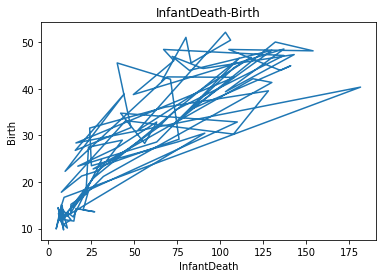

In [303]:
graph(poverty_df['InfantDeath'],poverty_df['Birth'],'InfantDeath','Birth')

<AxesSubplot:title={'center':'InfantDeath-Death'}, xlabel='InfantDeath', ylabel='Death'>

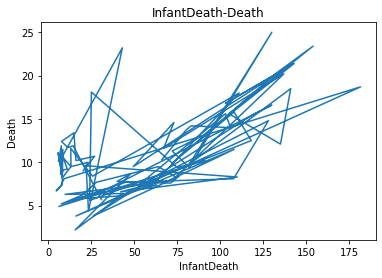

In [304]:
graph(poverty_df['InfantDeath'],poverty_df['Death'],'InfantDeath','Death')

In [305]:
def pie_chart(ax_y,g):
    poverty_df.groupby(g).sum().plot(kind='pie',y=ax_y, title=ax_y+" par "+g)

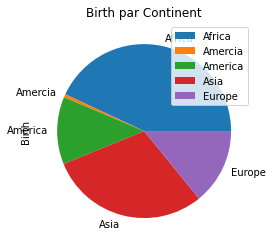

In [306]:
pie_chart('Birth','Continent')

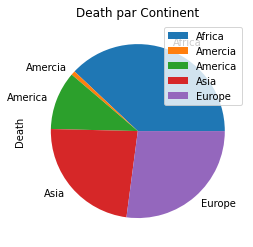

In [307]:
pie_chart('Death','Continent')

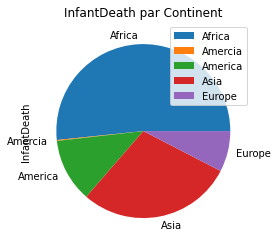

In [308]:
pie_chart('InfantDeath','Continent')

# Exercice 3

In [163]:
#correlation
student_df = pandas.read_csv('student-mat.csv', sep=';')
student_df

,Id,sex,age,address,famsize,Medu,Fedu,traveltime,studytime,failures,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Results
0,1,0,18,1,1,4,4,2,2,0,...,0,0,4,3,4,1,1,3,6,6
1,2,0,17,1,1,1,1,1,2,0,...,1,0,5,3,3,1,1,3,4,6
2,3,0,15,1,0,1,1,1,2,3,...,1,0,4,3,2,2,3,3,10,10
3,4,0,15,1,1,4,2,1,3,0,...,1,1,3,2,2,1,1,5,2,15
4,5,0,16,1,1,3,3,1,2,0,...,0,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,1,20,1,0,2,2,1,2,2,...,0,0,5,5,4,4,5,4,11,9
391,392,1,17,1,0,3,1,2,1,0,...,1,0,2,4,5,3,4,2,3,16
392,393,1,21,0,1,1,1,1,1,3,...,0,0,5,5,3,3,3,3,3,7
393,394,1,18,0,0,3,2,3,1,0,...,1,0,4,4,1,3,4,5,0,10


In [164]:
student_df['age'].corr(student_df['studytime'])

-0.00414003681618614

In [170]:
# Fonction qui calcule la corrélation entre deux variables
def corre(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

    corr = ((data1-mean1)*(data2-mean2)).mean()/(std1*std2)
    return corr

In [171]:
corre(student_df['age'],student_df['studytime'])

-0.0041295557103226774

In [314]:
# Fonction qui retourne un diagramme en bâton affichant la corrélation par ordre décroissant entre
# une variable donnée et le reste des variables du fichier
def bar_corre(val_name,df):
    i = 0
    resultats = []
    for col in df.columns:
        res = corre(df[val_name],df[col])
        resultats.append(res)
        
    data = {'Columns': df.columns,
        'Correlations': resultats}
    df = pandas.DataFrame(data)
    df = df.sort_values(by='Correlations',ascending=False)
    print(df)
    #plot bar chart des correlations
    df.plot(x="Columns", y='Correlations', kind="bar", title='Correlations '+val_name+" et d'autres")

      Columns  Correlations
2         age      0.997468
0          Id      0.756138
9    failures      0.243049
20   absences      0.174786
13   romantic      0.164252
..        ...           ...
3     address     -0.146351
21    Results     -0.161170
6        Fedu     -0.163024
5        Medu     -0.163244
10  schoolsup     -0.251173

[22 rows x 2 columns]


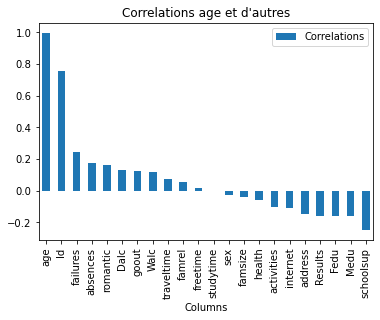

In [315]:
 bar_corre('age',student_df)

       Columns  Correlations
21     Results      0.997468
5         Medu      0.216598
6         Fedu      0.152071
3      address      0.105488
1          sex      0.103194
..         ...           ...
7   traveltime     -0.116845
13    romantic     -0.129641
16       goout     -0.132455
2          age     -0.161170
9     failures     -0.359502

[22 rows x 2 columns]


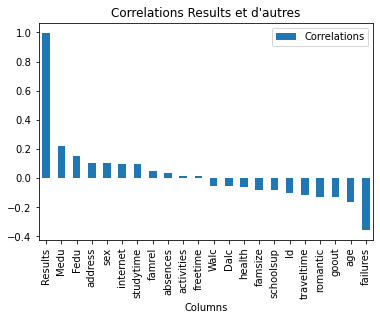

In [316]:
 bar_corre('Results',student_df)

In [ ]:
#les 3 variables les plus corrélées avec la variable Results
#correlation forte =[-1.0,-0.5] U [0.5,1.0]
# Plus le coefficient est proche des valeurs extrêmes -1 et 1, plus la correlation est forte 
#Donc les 3 variables les plus corrélées avec "Results" sont "failures" ,"Medu" et "age"